In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

In [8]:


# Load the data
data = pd.read_csv('merged_data.csv')  # Replace 'your_dataset.csv' with the path to your dataset file
"""
# Examine the data structure
print("Data Dimensions:", data.shape)  # Show number of rows and columns
print("\nData Info:")
print(data.info())  # Display data types and non-null counts
print("\nSummary Statistics:")
print(data.describe())  # Summary statistics for numerical columns
"""
# Display the first few rows of the dataset
print("\nFirst Few Rows:")
print(data.head())

# Identify target and feature columns
# Replace 'target_column_name' with the actual name of your target column
target_column = 'target_column_name'  
features = [col for col in data.columns if col != target_column]

print("\nTarget Column:", target_column)
print("Feature Columns:", features)



First Few Rows:
      #YY   MM   DD   hh    mm  WDIR  WSPD  GST  WVHT   DPD  ...    PRES  \
0     NaN  NaN  NaN  NaN   NaN   NaN   NaN  NaN   NaN   NaN  ...     NaN   
1  2020.0  1.0  1.0  0.0   0.0  69.0   5.5  7.1   1.3  14.3  ...  1014.4   
2  2020.0  1.0  1.0  0.0  10.0  64.0   4.5  5.5  99.0  99.0  ...  1014.4   
3  2020.0  1.0  1.0  0.0  20.0  63.0   4.7  5.8  99.0  99.0  ...  1014.5   
4  2020.0  1.0  1.0  0.0  30.0  72.0   5.1  6.4  99.0  99.0  ...  1014.6   

   ATMP   WTMP   DEWP   VIS  TIDE  WDI  R WSP  D GST  WSP  
0   NaN    NaN    NaN   NaN   NaN  NaN    NaN    NaN  NaN  
1  26.7   28.1  999.0  99.0  99.0  NaN    NaN    NaN  NaN  
2  26.6  999.0  999.0  99.0  99.0  NaN    NaN    NaN  NaN  
3  26.9  999.0  999.0  99.0  99.0  NaN    NaN    NaN  NaN  
4  27.0  999.0  999.0  99.0  99.0  NaN    NaN    NaN  NaN  

[5 rows x 22 columns]

Target Column: target_column_name
Feature Columns: ['#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'MWD', 'PRES',

Clean the Data

In [11]:

# Drop the first row (index 0)
data = data.drop(index=0)

# Reset the index if needed (optional)
data = data.reset_index(drop=True)

# Display the updated DataFrame to confirm the first row is dropped
print("Data after dropping the first row:")
print(data.head())

# 1. Handle Missing Values
# Option 1: Drop rows with any missing values
# Drop columns where all values are NaN
# Specify columns to drop (replace these names with the actual column names in your dataset)
columns_to_drop = ['DEWP', 'VIS', 'TIDE', 'WDI', 'R WSP','D GST', 'WSP']

# Drop the specified columns
data = data.drop(columns=columns_to_drop)

# Display the resulting DataFrame to confirm columns have been dropped
print("Data after dropping specified columns:")
print(data.head())
# Option 2: Fill missing values
# Fill numerical columns with the mean
data_filled = data.fillna(data.mean())



""""
# 2. Correct Data Types
# Convert columns to appropriate types if needed
# For example, convert a date column to datetime
# Replace 'date_column' with the actual column name containing date information
data['date_column'] = pd.to_datetime(data['date_column'], errors='coerce')

# Display the cleaned data info
print("\nData Info after Cleaning:")
print(data_cleaned.info())
"""

Data after dropping the first row:
      #YY   MM   DD   hh    mm  WDIR  WSPD  GST  WVHT   DPD   APD    MWD  \
0  2020.0  1.0  1.0  0.0   0.0  69.0   5.5  7.1   1.3  14.3  99.0   42.0   
1  2020.0  1.0  1.0  0.0  10.0  64.0   4.5  5.5  99.0  99.0  99.0  999.0   
2  2020.0  1.0  1.0  0.0  20.0  63.0   4.7  5.8  99.0  99.0  99.0  999.0   
3  2020.0  1.0  1.0  0.0  30.0  72.0   5.1  6.4  99.0  99.0  99.0  999.0   
4  2020.0  1.0  1.0  0.0  40.0  76.0   4.6  5.8  99.0  99.0  99.0  999.0   

     PRES  ATMP   WTMP  
0  1014.4  26.7   28.1  
1  1014.4  26.6  999.0  
2  1014.5  26.9  999.0  
3  1014.6  27.0  999.0  
4  1014.8  27.0  999.0  


KeyError: "['DEWP', 'VIS', 'TIDE', 'WDI', 'R WSP', 'D GST', 'WSP'] not found in axis"

Descriptive Statistics:
                 #YY             MM             DD             hh  \
count  206916.000000  206916.000000  206916.000000  206916.000000   
mean        0.499726       0.503134       0.489288       0.500042   
std         0.374210       0.314540       0.293743       0.301188   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.272727       0.233333       0.217391   
50%         0.666667       0.545455       0.500000       0.521739   
75%         1.000000       0.818182       0.733333       0.782609   
max         1.000000       1.000000       1.000000       1.000000   

                  mm           WDIR          WSPD           GST  \
count  206916.000000  154341.000000  45894.000000  52451.000000   
mean        0.498974       0.297035      0.527850      0.553817   
std         0.341576       0.153063      0.238776      0.268818   
min         0.000000       0.000000      0.000000      0.000000   
25%         0.20000

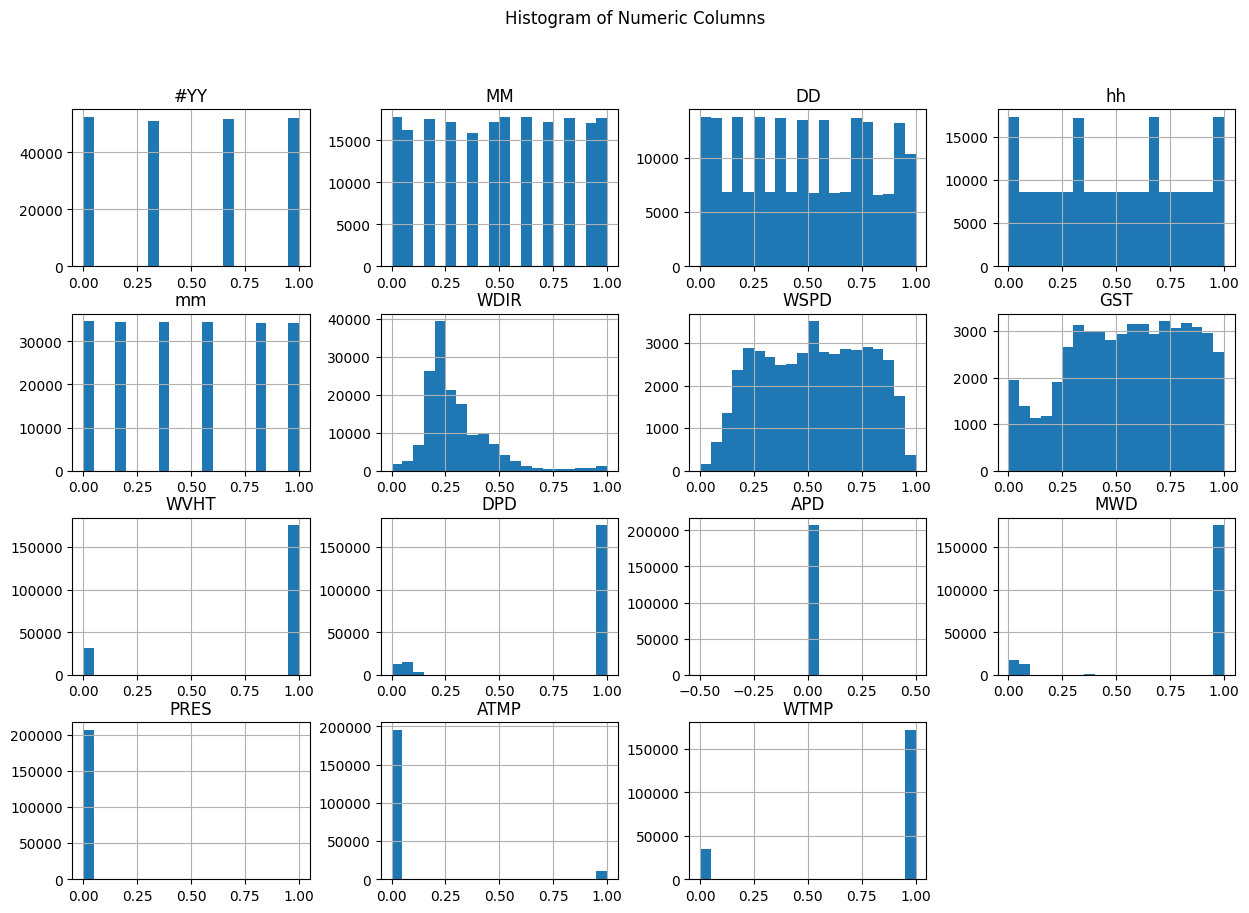

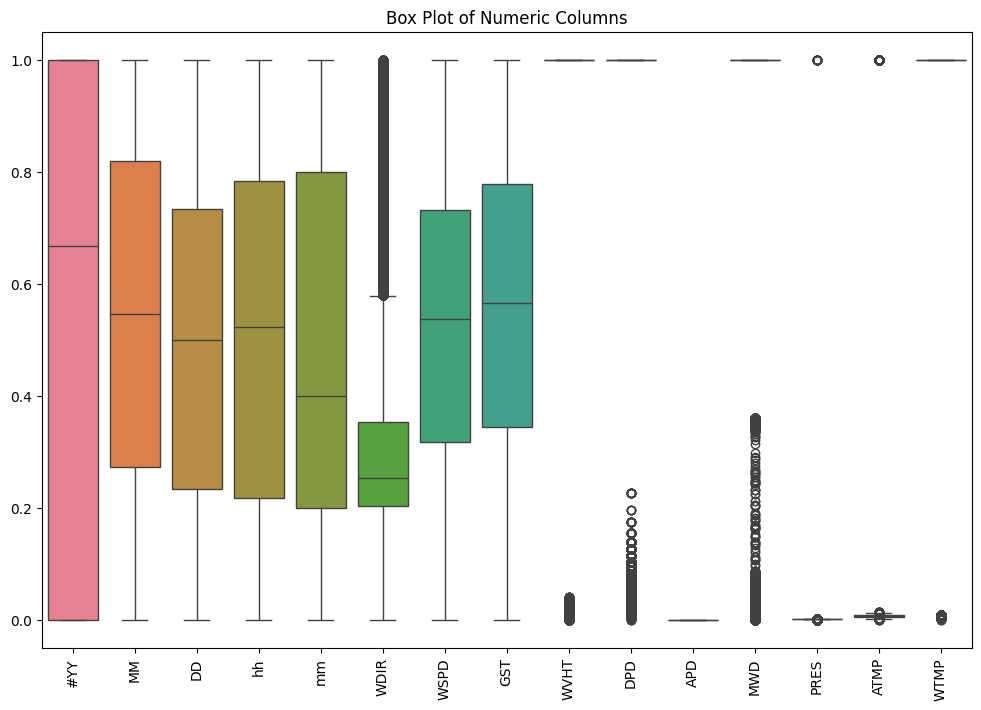


Correlation Matrix:
           #YY        MM        DD        hh        mm      WDIR      WSPD  \
#YY   1.000000  0.000189 -0.002091 -0.000480 -0.001092 -0.028074       NaN   
MM    0.000189  1.000000  0.013666  0.000185 -0.000549  0.101916 -0.093455   
DD   -0.002091  0.013666  1.000000  0.000336  0.000243 -0.033436  0.013053   
hh   -0.000480  0.000185  0.000336  1.000000  0.000183 -0.169764  0.303835   
mm   -0.001092 -0.000549  0.000243  0.000183  1.000000  0.000796  0.001986   
WDIR -0.028074  0.101916 -0.033436 -0.169764  0.000796  1.000000 -0.538945   
WSPD       NaN -0.093455  0.013053  0.303835  0.001986 -0.538945  1.000000   
GST        NaN  0.018068 -0.006418  0.142210  0.004089 -0.297419  0.982349   
WVHT -0.050229  0.014472  0.007539  0.001221  0.621511 -0.002106  0.024746   
DPD  -0.049901  0.014454  0.008836  0.001178  0.619808 -0.000895  0.023238   
APD        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
MWD  -0.049202  0.013770  0.007132  0.00140

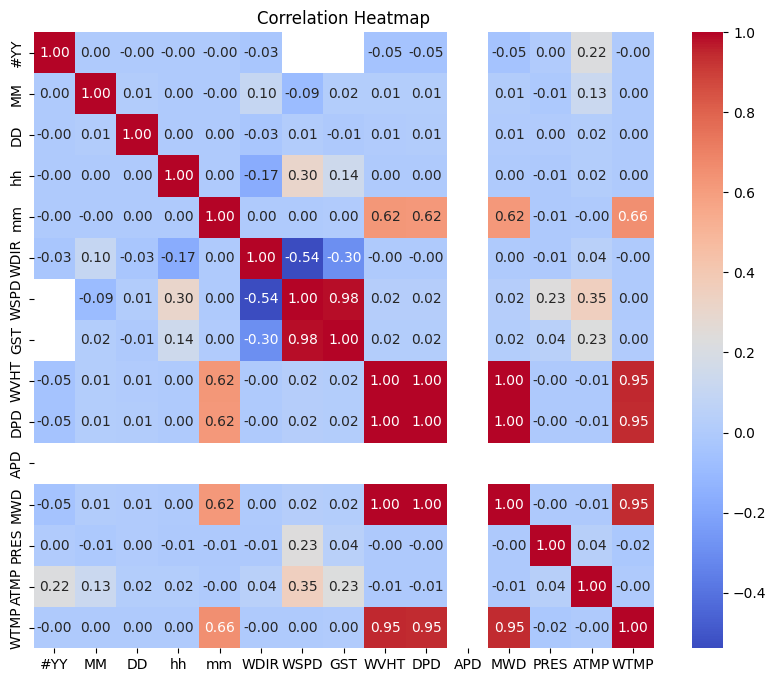

In [14]:
# 1. Descriptive Statistics
print("Descriptive Statistics:")
print(data.describe())  # Provides statistics like mean, median, std for numeric columns

# 2. Data Visualization
# Histograms for each numeric column
data.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histogram of Numeric Columns")
plt.show()
"""
# Scatter plot example for two variables (replace 'column_x' and 'column_y' with actual column names)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='column_x', y='column_y')
plt.title("Scatter Plot between column_x and column_y")
plt.show()
"""

# Box plot to check distributions and outliers for each numeric column
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']))
plt.title("Box Plot of Numeric Columns")
plt.xticks(rotation=90)
plt.show()

# 3. Correlation Analysis
# Correlation matrix
correlation_matrix = data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Standardization and Normalization

In [ ]:
# Select only numeric columns for standardization
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

print("Data after Standardization:")
print(data[numeric_columns].head())

# Min-Max scaling
scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

print("Data after Min-Max Normalization:")
print(data[numeric_columns].head())

# Max Abs scaling
scaler = MaxAbsScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

print("Data after Max Abs Scaling:")
print(data[numeric_columns].head())


Data after Standardization:
        #YY        MM        DD        hh        mm      WDIR      WSPD  \
0 -1.335419 -1.599592 -1.665701 -1.660239 -1.460803 -0.688402  0.394104   
1 -1.335419 -1.599592 -1.665701 -1.660239 -0.875281 -0.779142 -0.116637   
2 -1.335419 -1.599592 -1.665701 -1.660239 -0.289759 -0.797290 -0.014488   
3 -1.335419 -1.599592 -1.665701 -1.660239  0.295764 -0.633958  0.189808   
4 -1.335419 -1.599592 -1.665701 -1.660239  0.881286 -0.561366 -0.065562   

        GST      WVHT       DPD  APD       MWD      PRES      ATMP      WTMP  
0  0.607684 -2.349647 -2.192483  0.0 -2.373922 -0.014135 -0.241036 -2.227426  
1  0.006468  0.425491  0.424342  0.0  0.424657 -0.014135 -0.241490  0.448932  
2  0.119196  0.425491  0.424342  0.0  0.424657 -0.013031 -0.240128  0.448932  
3  0.344652  0.425491  0.424342  0.0  0.424657 -0.011926 -0.239673  0.448932  
4  0.119196  0.425491  0.424342  0.0  0.424657 -0.009717 -0.239673  0.448932  


'\n# Min-Max scaling\nscaler = MinMaxScaler()\ndata[numeric_columns] = scaler.fit_transform(data[numeric_columns])\n\nprint("Data after Min-Max Normalization:")\nprint(data[numeric_columns].head())\n\n# Max Abs scaling\nscaler = MaxAbsScaler()\ndata[numeric_columns] = scaler.fit_transform(data[numeric_columns])\n\nprint("Data after Max Abs Scaling:")\nprint(data[numeric_columns].head())\n'